In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from subset_helper import subset_helper

**<font color='blue'> Notebook description</font>**

<font color='blue'>This script serves as an exploratory tool to calculate the summary statistics of the mortality data, not directly linked to the machine learning model. Rather, it gives us an overview of how our dataset behaves, and some preliminary insight. It is also an important step in the data science pipeline.</font>

In [2]:
# import data
mortality = pd.read_csv('../data/mortality_merged.csv')

In [3]:
mortality = subset_helper(mortality).subset()

**<font color='blue'>Univariate analysis</font>**

<font color='blue'>Total death cases are mostly constituted by the elderly.</font>

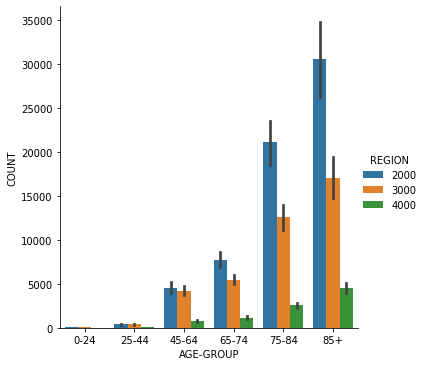

In [4]:
# Total death cases per each age group for each given city
sns.catplot(x = 'AGE-GROUP', y = 'COUNT', hue = 'REGION',  kind = 'bar', estimator = np.sum,
            data = mortality)

<font color='blue'>Total death cases related to female is a little bit higher than male.</font>

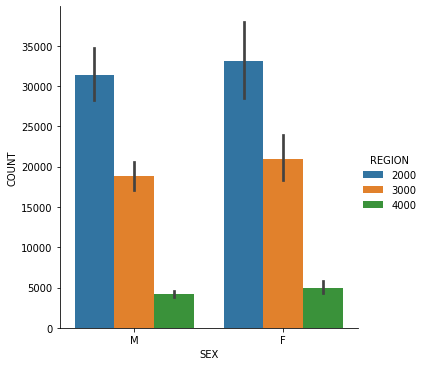

In [5]:
# Total death cases per each gender group for each given city
sns.catplot(x = 'SEX', y = 'COUNT', hue = 'REGION',  kind = 'bar', estimator = np.sum,
            data = mortality)

<font color='blue'>Most of the death cases are related to illness in circulatory system.</font>

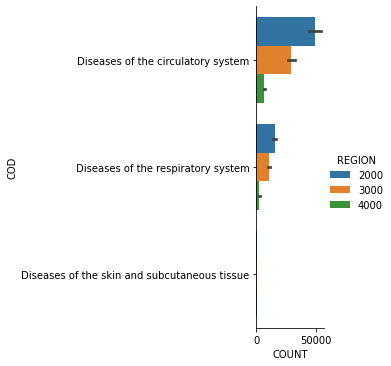

In [6]:
# Total death cases per each cause of death for each given city
sns.catplot(x = 'COUNT', y = 'COD', hue = 'REGION',  kind = 'bar', estimator = np.sum,
            data = mortality)

<font color='blue'>The patterns of warm days are the same for all 3 cities. The number of warm days surge for years 2010, 2015, 2016 and 2017. </font>

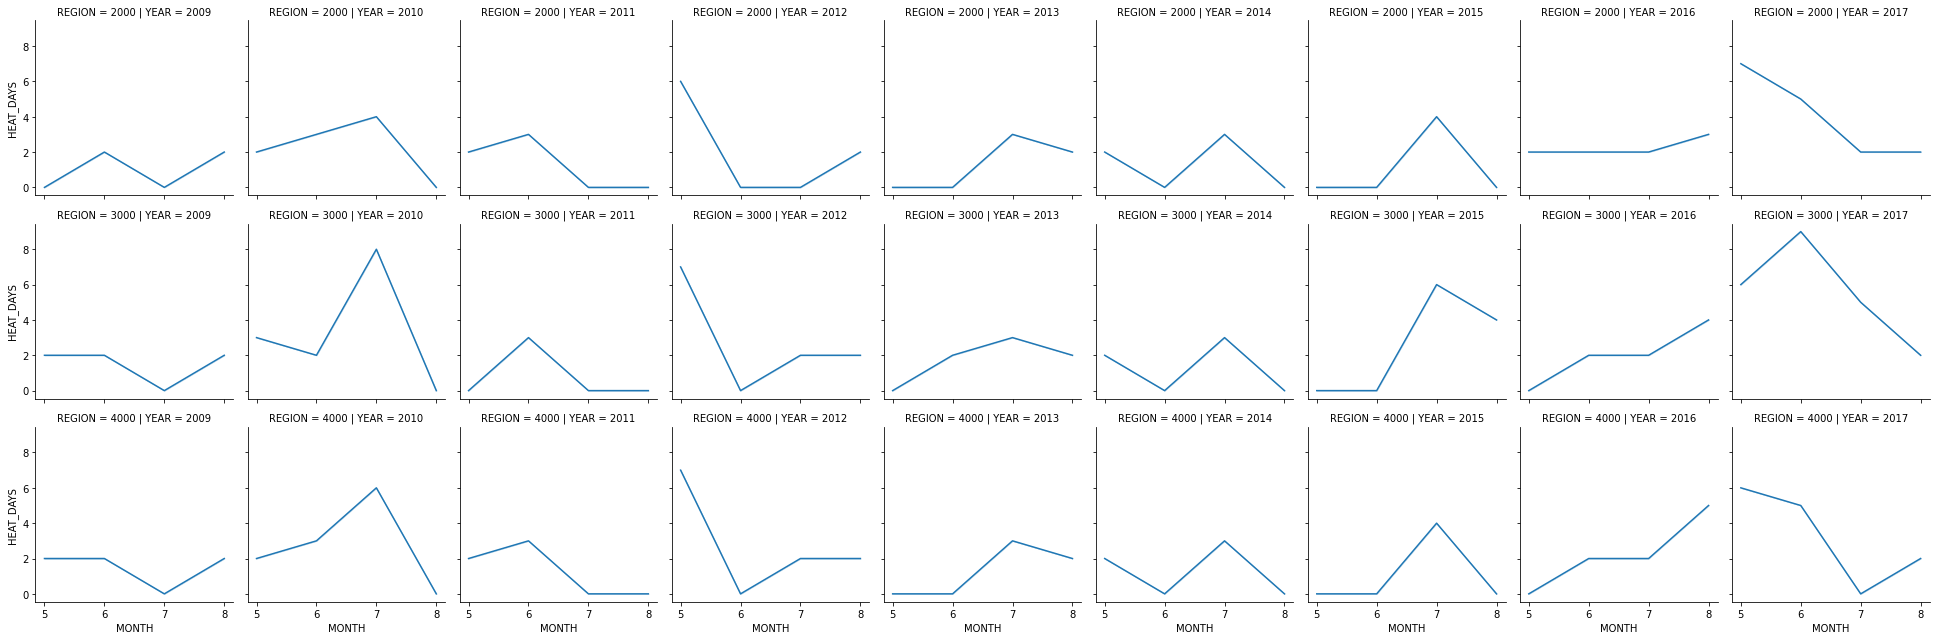

In [7]:
# Time series plot
gridplot = sns.FacetGrid(mortality, col = 'YEAR',  row = 'REGION')
gridplot.map(sns.lineplot, 'MONTH', 'HEAT_DAYS')

**<font color='blue'>Correlation analysis</font>**

<font color='blue'>The correlation coefficients among the chosen meteorological features are not strong. During feature engineering, we also keep track of the correlation matrix to avoid collinearity problem.</font>

In [8]:
# Spearman correlation matrix for meteorological features
mortality[mortality.columns[7:]].corr(method = 'spearman')

,TEMP_MEAN,TEMP_RNG,WS50M_MEAN,PRECTOT_MEAN,RH2M_MEAN,HEAT_DAYS
TEMP_MEAN,1.000000,0.164942,-0.375199,-0.155885,-0.487063,0.372114
TEMP_RNG,0.164942,1.000000,-0.149964,-0.359403,-0.509049,0.354078
WS50M_MEAN,-0.375199,-0.149964,1.000000,0.128752,0.165690,-0.262826
PRECTOT_MEAN,-0.155885,-0.359403,0.128752,1.000000,0.518091,-0.326473
RH2M_MEAN,-0.487063,-0.509049,0.165690,0.518091,1.000000,-0.254311
HEAT_DAYS,0.372114,0.354078,-0.262826,-0.326473,-0.254311,1.000000


**<font color='blue'>Summary statistics</font>**

In [9]:
mortality[mortality.columns[7:]].describe()

,TEMP_MEAN,TEMP_RNG,WS50M_MEAN,PRECTOT_MEAN,RH2M_MEAN,HEAT_DAYS
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000
mean,20.673304,14.377059,5.767103,2.410992,76.493018,2.030048
std,2.456699,1.177085,0.524364,1.045266,3.386087,2.091374
min,14.256129,11.250000,4.735806,0.578710,68.628333,0.000000
25%,19.163667,13.560000,5.314839,1.665161,74.052000,0.000000
50%,20.694000,14.470000,5.761613,2.175484,76.513548,2.000000
75%,22.841935,15.230000,6.222581,3.073548,78.689355,3.000000
max,24.334194,16.550000,6.739032,4.929355,85.160000,9.000000
